<a href="https://colab.research.google.com/github/Sridharanjaisankar/convolutional-denoising-autoencoder/blob/main/Ex7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [24]:
(x_train, _), (x_test, _) = mnist.load_data()

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
x_test.shape

(10000, 28, 28)

In [27]:
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.

In [28]:
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [29]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape)
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape)

In [30]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

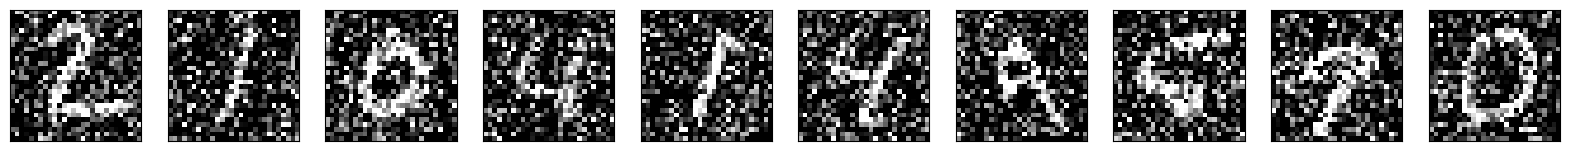

In [31]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [32]:
input_img = keras.Input(shape=(28, 28, 1))

In [33]:
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
x=layers.MaxPooling2D((2, 2), padding='same')(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)

In [34]:
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [35]:
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)

In [36]:
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid',padding='same')(x)

In [37]:
autoencoder = keras.Model(input_img, decoded)

In [38]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 32)          9248

In [39]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [40]:
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=2,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/2
469/469 [==============================] - 153s 322ms/step - loss: 0.1673 - val_loss: 0.1158
Epoch 2/2
469/469 [==============================] - 132s 283ms/step - loss: 0.1128 - val_loss: 0.1082


<Axes: >

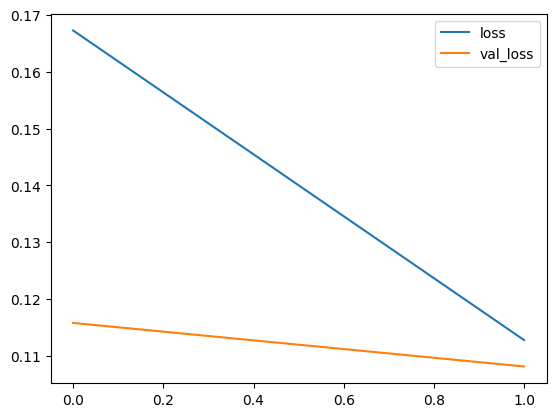

In [41]:
import pandas as pd
metrics=pd.DataFrame(autoencoder.history.history)
metrics[['loss','val_loss']].plot()

In [42]:
decoded_imgs = autoencoder.predict(x_test_noisy)


313/313 [==============================] - 5s 17ms/step


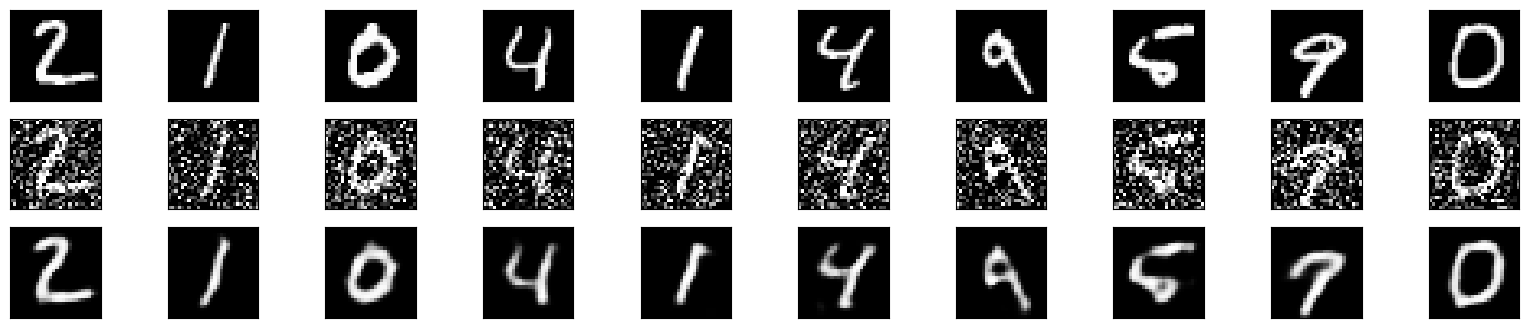

In [43]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()